In [4]:
import pandas 
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import rc

rc('font', family='Source Sans Pro') 
plt.style.use( 'bmh' ) 

# BglB kinetic data and thermal stability data statistical analysis 

## Kinetics 

In [6]:
# see notebook in raw/ for data preprocessing 
df = pandas.read_csv( 'pub/kinetics.csv' ) 
#df = pandas.read_csv( 'pub/kinetics.csv' ) 
df = df[ ( df.kobs > 0 ) ] 

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

12 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'protein_yield', 'dilution',
       'note', 'kobs', 's'],
      dtype='object')


In [7]:
p0=(3,1)
null = np.array( [ np.nan for i in range( len( p0 ) ) ] )
null

array([ nan,  nan])

In [8]:
def my_curve_fit( f, xdata, ydata, p0 ):
    null_return = ( [ np.nan, np.nan ], [ np.nan, np.nan ] )
    try:
        curve_return = curve_fit( f, xdata, ydata, p0 )
        if len( curve_return ) == 2:
            errors = np.sqrt( np.diag( curve_return[1] ) ) 
            return curve_return[0], errors 
        else:
            return null_return
    except:
        return null_return

In [9]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

In [10]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) != 24:
        print( idx, 'ain\'t got no ({} data points)'.format( len( data ) ) )

F415N ain't got no (21 data points)
L362M ain't got no (21 data points)
N220G ain't got no (21 data points)
N220R ain't got no (21 data points)
N220Y ain't got no (21 data points)
N293C ain't got no (21 data points)
N404C ain't got no (22 data points)
T15A ain't got no (21 data points)
W325R ain't got no (23 data points)
W399R ain't got no (20 data points)
W409Y ain't got no (23 data points)
WT ain't got no (21 data points)


In [11]:
my_mutants = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    params, std_err = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    my_mutants.loc[ idx ] = np.append( params, std_err )
    
# rename my_mutants to mm_fits!!!!!!!!!!!

In [12]:
good_fits = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] )
for idx, data in my_mutants.iterrows():
    if data.kcat > data.kcat_std_err and data.km > data.km_std_err:
        good_fits.loc[ idx ] = data 
    else:
        good_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
good_fits

,kcat,km,kcat_std_err,km_std_err
F415N,0.893262,0.230694,0.028304,0.019439
L362M,918.087350,0.052008,9.788308,0.002117
N220G,210.359965,0.335047,6.201651,0.023374
N220R,14.914215,0.124195,0.528695,0.013891
N220Y,628.540534,0.003593,4.773319,0.000150
N293C,11.067364,0.196744,0.412239,0.020419
N404C,85.426494,0.143105,3.736449,0.019039
T15A,614.809010,0.052498,14.702005,0.004784
W325R,NaN,NaN,NaN,NaN
W399R,0.200115,0.032894,0.012750,0.008687


In [13]:
# try linear fits as well! 

lin_fits = pandas.DataFrame( columns=[ 'lin_slope', 'lin_intercept', 'rvalue', 'pvalue', 'lin_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    lin_fit = linregress( data.s, data.kobs ) 
    lin_fits.loc[ idx ] = lin_fit
    
lin_fits

,lin_slope,lin_intercept,rvalue,pvalue,lin_std_err
F415N,0.879901,0.068810,0.953245,2.518561e-11,0.063995
L362M,1058.245054,173.376352,0.832728,2.815468e-06,161.423425
N220G,192.809124,8.709798,0.960460,5.271270e-12,12.822413
N220R,16.423407,1.628680,0.894660,4.480779e-08,1.881442
N220Y,510.403699,315.326278,0.558482,8.504364e-03,173.921524
N293C,11.418361,0.857690,0.934192,6.009417e-10,1.000414
N404C,93.661179,8.633934,0.929241,4.231498e-10,8.327241
T15A,709.210160,117.984849,0.840750,1.824634e-06,104.777774
W325R,2.079043,0.091654,0.961790,2.733482e-13,0.129147
W399R,0.216135,0.054813,0.775024,5.991466e-05,0.041538


In [14]:
any( np.array( [ np.nan, np.nan, np.nan, ] ) )

True

All the plotting logic goes here, to produce publication-quality plots is a lot of code

In [15]:
def lin_f( x, m, b ):
    return m*x+b

F415N 
 MM params (kcat, km): [ 0.89326195  0.23069391] 
 linear params (slope, int): [ 0.87990142  0.06880959]


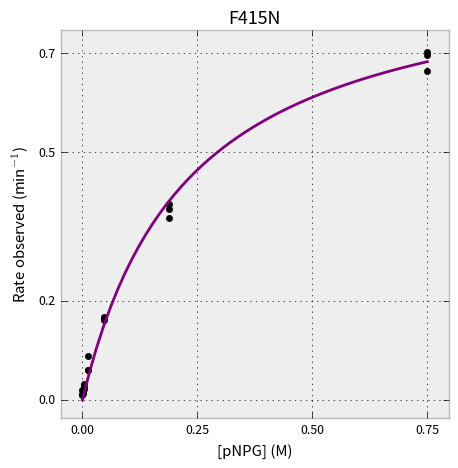

L362M 
 MM params (kcat, km): [  9.18087350e+02   5.20084359e-02] 
 linear params (slope, int): [ 1058.2450544    173.37635194]


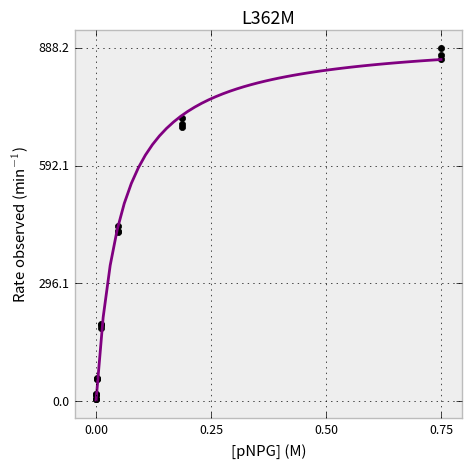

N220G 
 MM params (kcat, km): [ 210.35996518    0.33504679] 
 linear params (slope, int): [ 192.80912369    8.70979841]


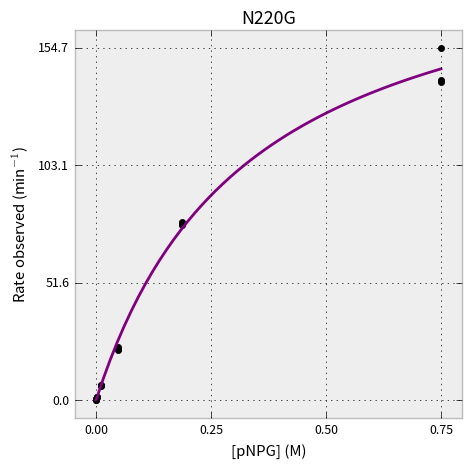

N220R 
 MM params (kcat, km): [ 14.91421505   0.12419478] 
 linear params (slope, int): [ 16.42340711   1.62868022]


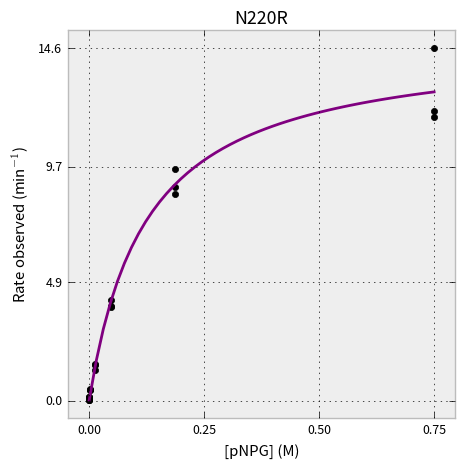

N220Y 
 MM params (kcat, km): [  6.28540534e+02   3.59310038e-03] 
 linear params (slope, int): [ 510.40369906  315.32627803]


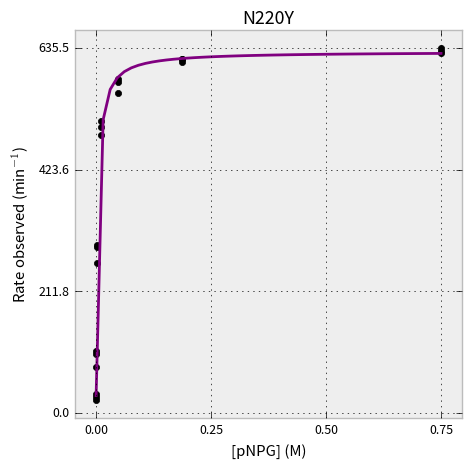

N293C 
 MM params (kcat, km): [ 11.06736426   0.1967436 ] 
 linear params (slope, int): [ 11.41836131   0.85768976]


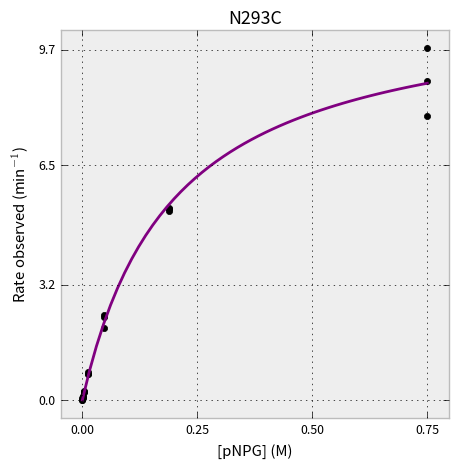

N404C 
 MM params (kcat, km): [ 85.42649363   0.14310523] 
 linear params (slope, int): [ 93.66117949   8.63393393]


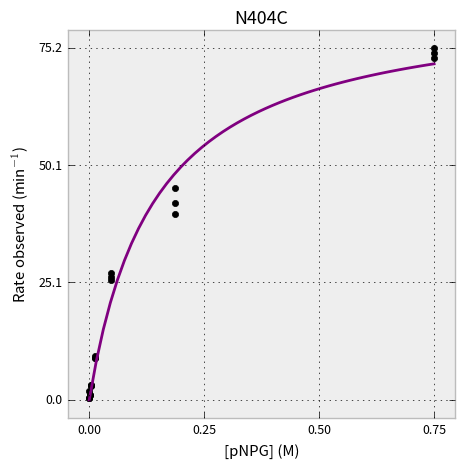

T15A 
 MM params (kcat, km): [  6.14809010e+02   5.24977680e-02] 
 linear params (slope, int): [ 709.21015997  117.98484897]


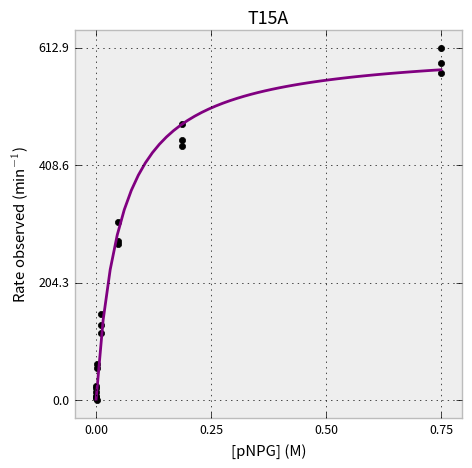

W325R 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 2.07904314  0.09165352]


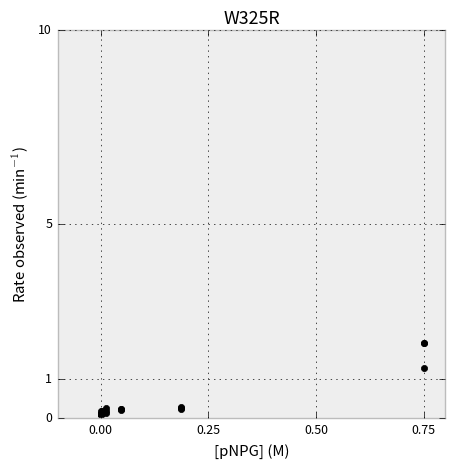

W399R 
 MM params (kcat, km): [ 0.20011546  0.0328944 ] 
 linear params (slope, int): [ 0.21613527  0.05481296]


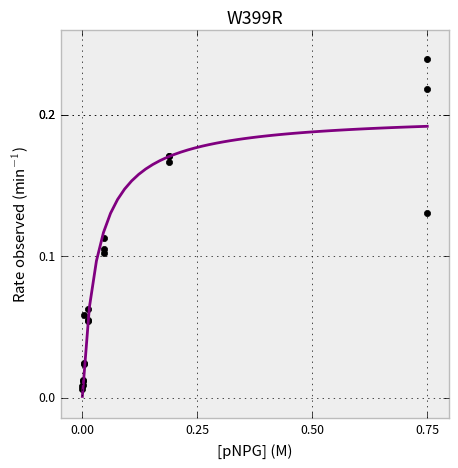

W409Y 
 MM params (kcat, km): [  8.10751626e+02   2.55297238e-02] 
 linear params (slope, int): [ 926.1407013   193.80656077]


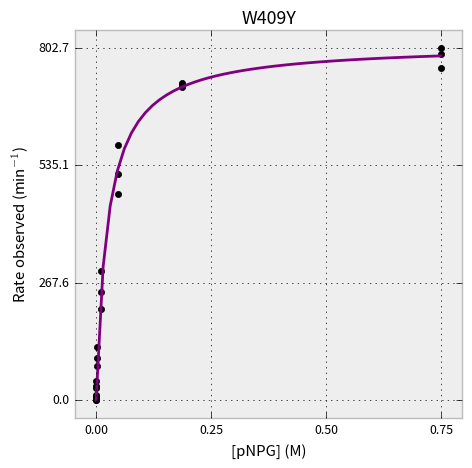

WT 
 MM params (kcat, km): [  9.19667364e+02   5.21800125e-02] 
 linear params (slope, int): [ 1060.15682029   169.85314971]


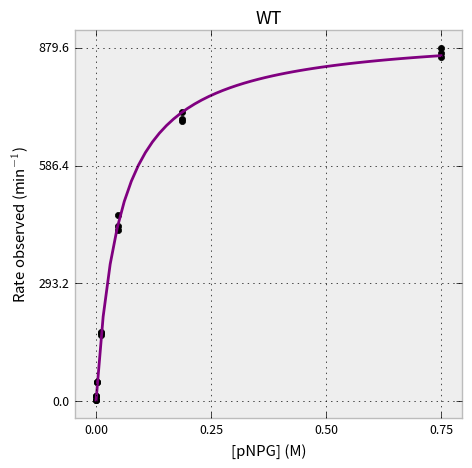

In [16]:
for i, (idx, data) in enumerate( df.groupby( 'mutant' ) ):
    
    x_vals = np.linspace( data.s.min(), data.s.max(), 50 )
    my_params = good_fits.loc[ idx ][ 0 : 2 ] # could be [ [ 'kcat', 'km' ] ] 
    my_lin = lin_fits.loc[ idx ][ [ 'lin_slope', 'lin_intercept' ] ]
    print( idx, '\n MM params (kcat, km):', my_params.values, '\n linear params (slope, int):', my_lin.values ) 

    plt.figure( figsize=( 5, 5 ) ) 
    plt.title( idx )         
    plt.xlabel( '[pNPG] (M)' ) 
    plt.ylabel( 'Rate observed (min$^{-1}$)' ) 
    plt.scatter( data.s, data.kobs, color='k' )
    plt.xticks( ( 0, .25, .5, .75 ) ) 
    plt.yticks( np.linspace( 0, data.kobs.max(), 4 ).round(1) )
    
    if 0 == len( list( filter( np.isnan, my_params ) ) ): 
        plt.plot( x_vals, v( x_vals, *my_params ), color='purple' ) 
    else:
        if my_lin[ 'lin_slope' ] > 10:
            plt.plot( x_vals, lin_f( x_vals, *my_lin), color='green' )
        plt.ylim( 0, 10 ) 
        plt.yticks( ( 0, 1, 5, 10 ) ) 
        
    plt.show()

# Thermal stability 

In [17]:
df = pandas.read_csv( 'pub/thermal.csv' ) 
df = df[ ( df.rate > 0 ) ]

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

80 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'temp'], dtype='object')


In [18]:
def r( x, x0, k ): 
    return 1 / ( 1 + np.exp( -k * ( x - x0 ) ) )

In [19]:
my_thermal = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    norm_rates = data[ 'rate' ] / data[ 'rate' ].max()
    params, cov = my_curve_fit( r, data.temp, norm_rates, ( 40, -1 ) )
    my_thermal.loc[ idx ] = np.append( params, cov ) 
    #print( np.append( params, cov ) ) 

In [20]:
good_thermal_fits = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] )
for idx, data in my_thermal.iterrows():
    if 30 < data.tm < 50 and data.k < 0:
        good_thermal_fits.loc[ idx ] = data 
    else:
        good_thermal_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
pandas.options.display.max_rows = 1000 
good_thermal_fits

,tm,k,tm_std_err,k_std_err
A192S,39.082872,-0.906737,0.341891,0.273713
BglB,39.859552,-1.145110,0.109541,0.088947
C167A,39.735604,-1.388449,0.552891,0.592386
C167Q,38.471592,-0.529363,0.192137,0.047938
E154D,38.699119,-0.688705,0.378855,0.167384
E164A,45.994408,-0.374600,0.132617,0.017976
E177A,37.307655,-0.486928,0.268726,0.056406
E177K,36.649703,-0.666760,0.278218,0.107651
E177L,39.223979,-0.520416,0.507574,0.121244
E222A,36.743814,-0.656627,0.142625,0.053160


A192S


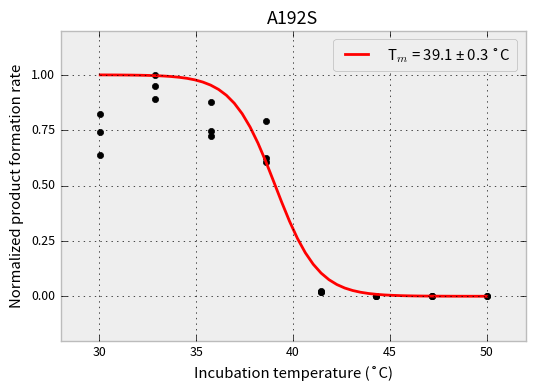

BglB


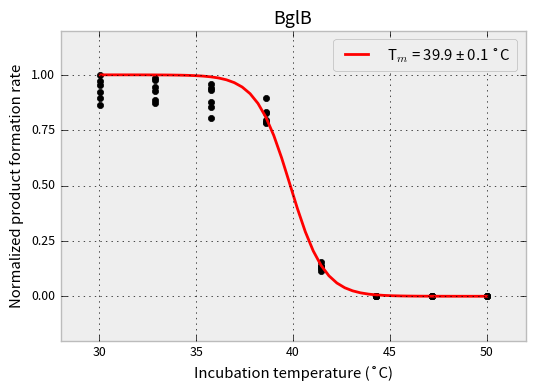

C167A


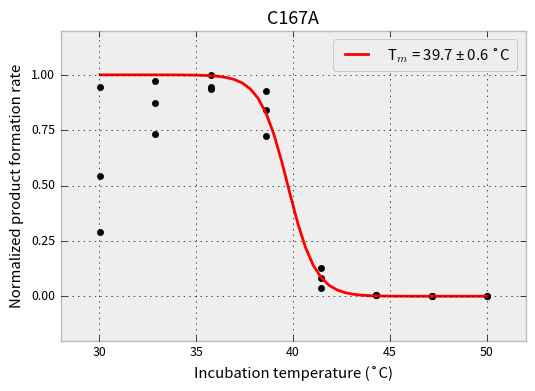

C167Q


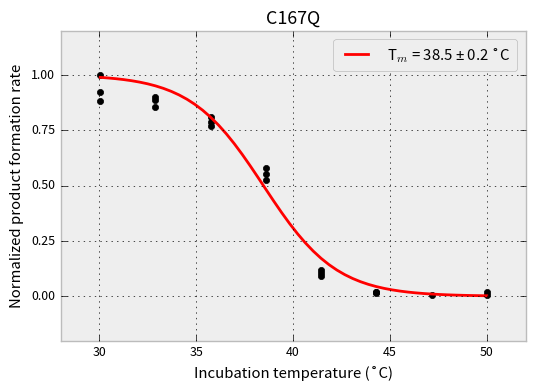

E154D


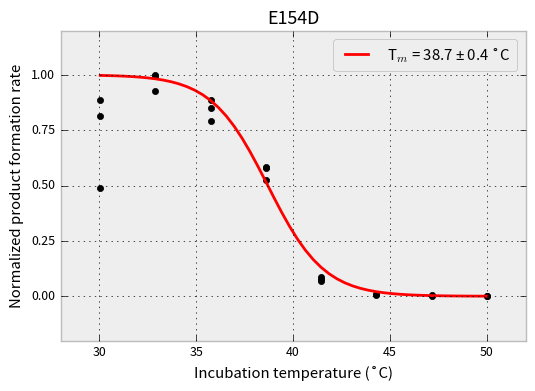

E164A


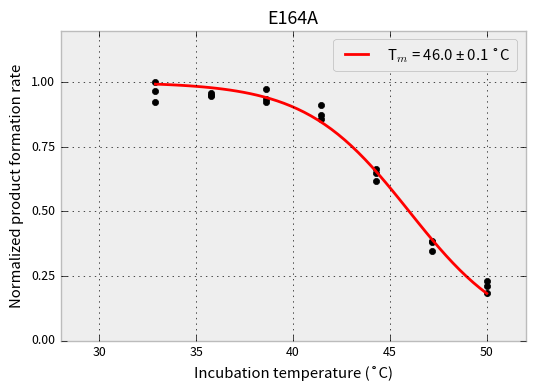

E177A


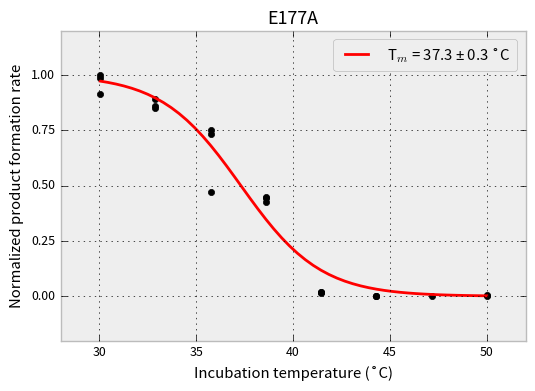

E177K


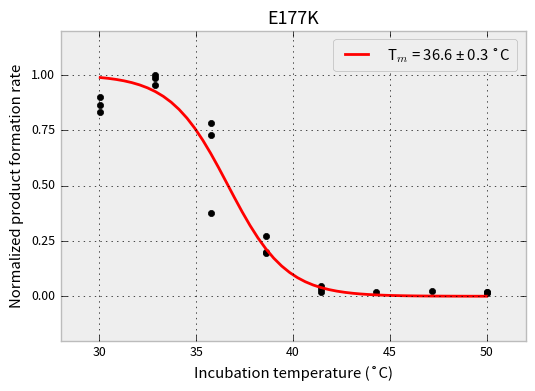

E177L


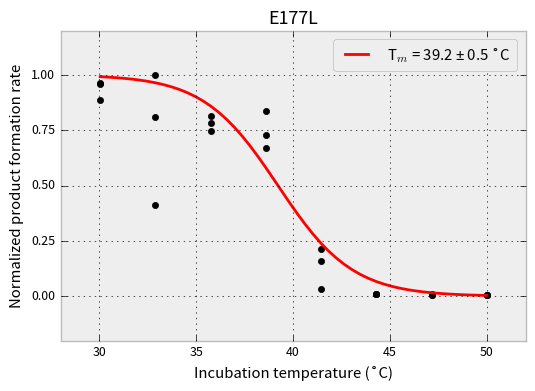

E222A


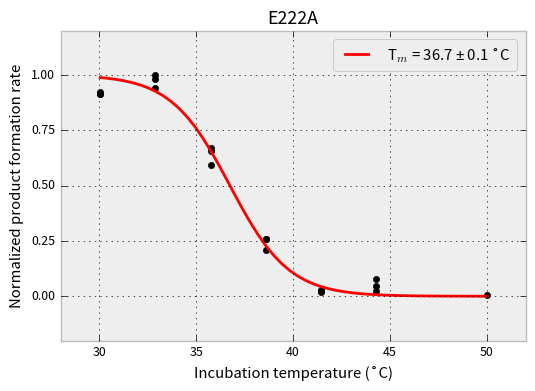

E222H


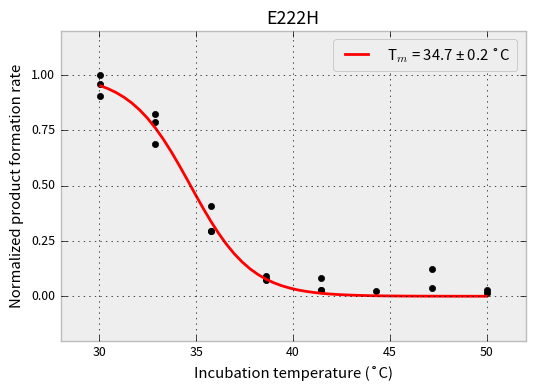

E222K


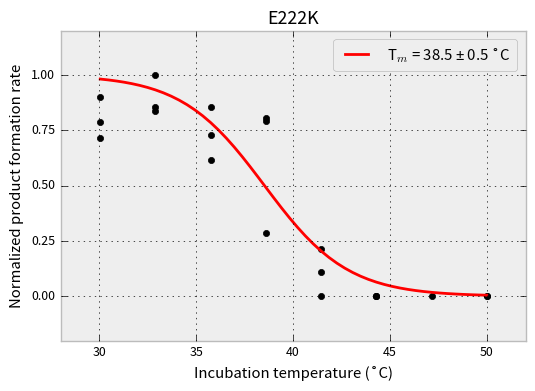

E222Q


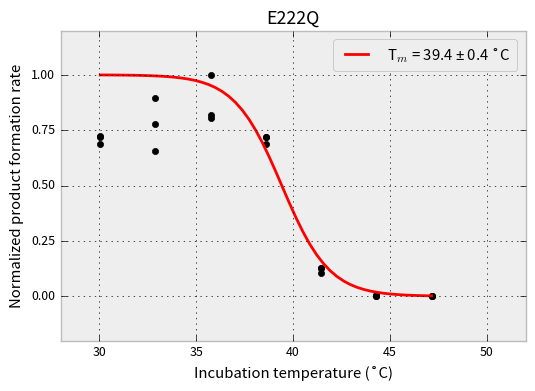

E222R


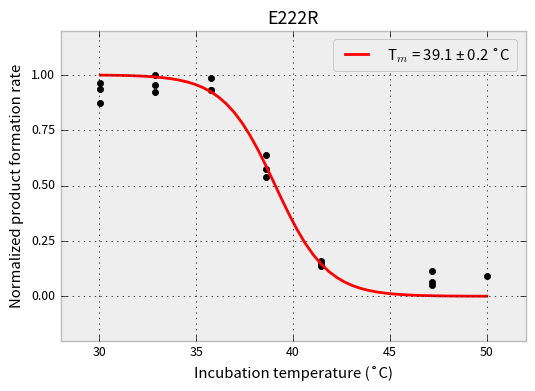

E222Y


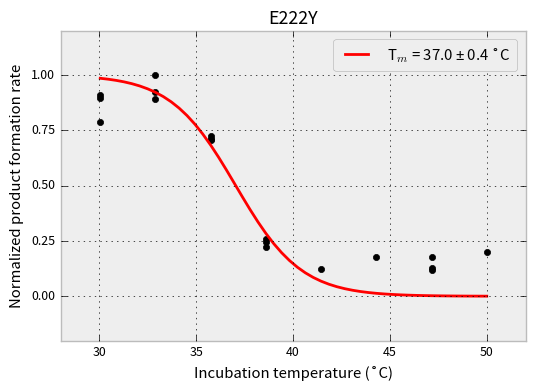

E406A


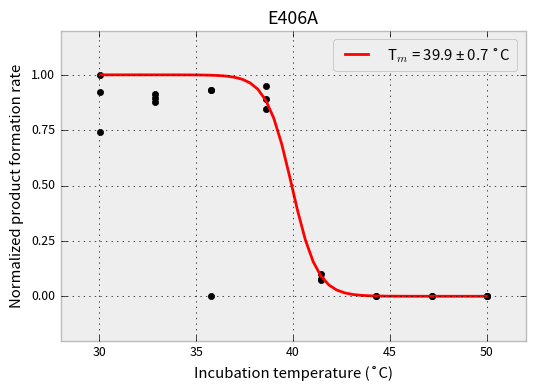

E406D


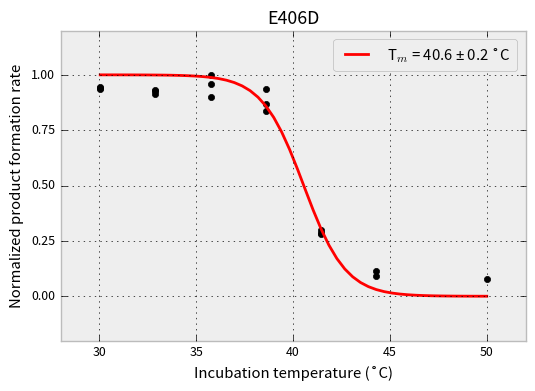

E423S


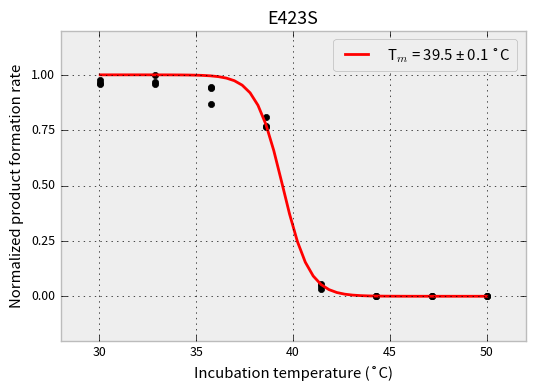

F415A


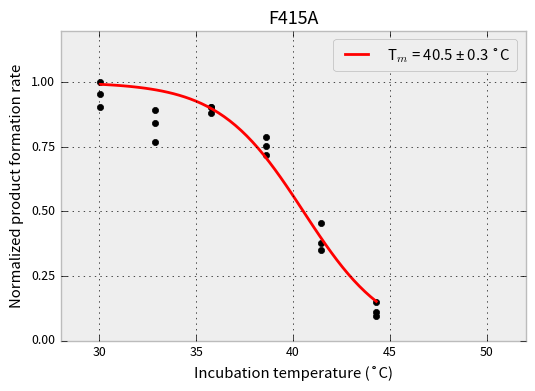

F72A


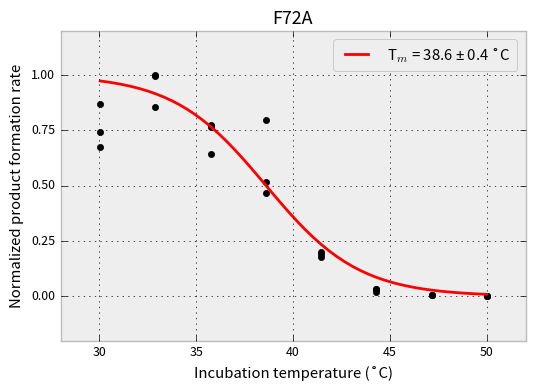

H101R


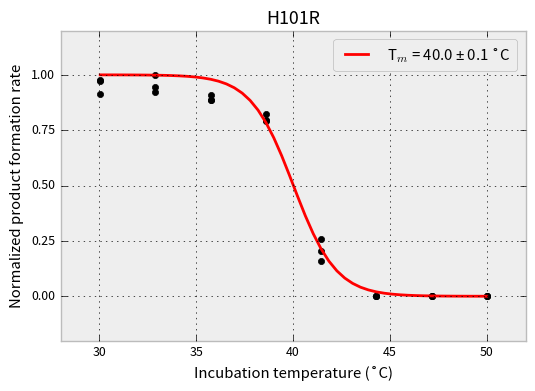

H119A


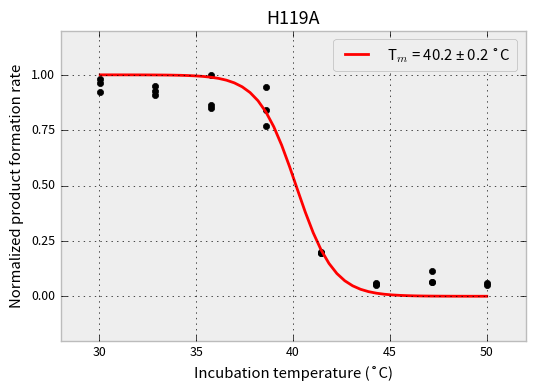

H119N


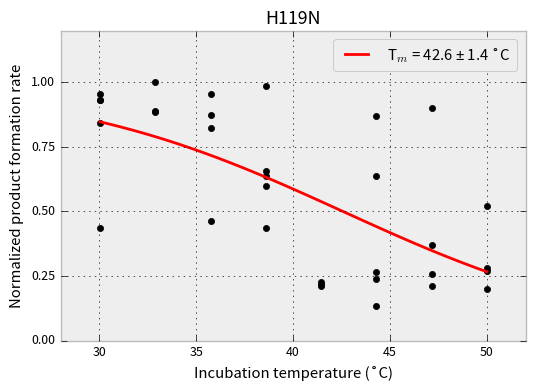

H178A


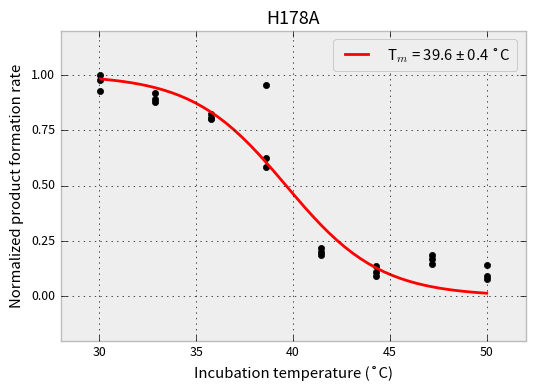

H373R


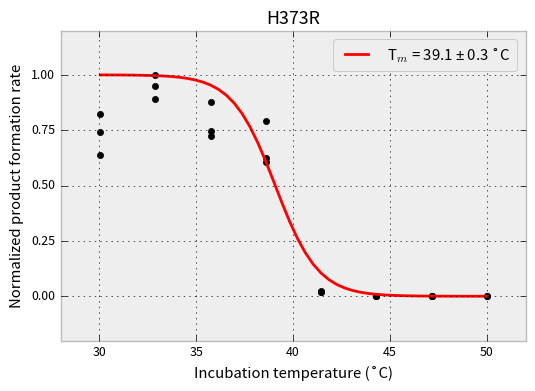

I244E


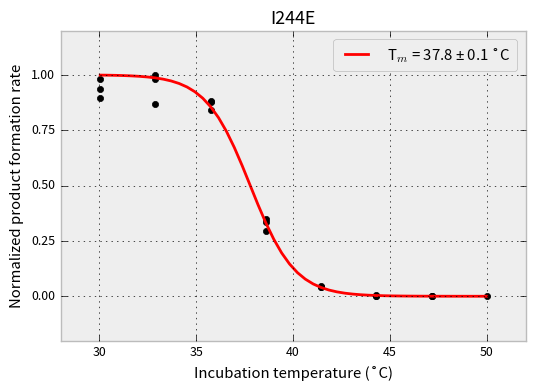

I244N


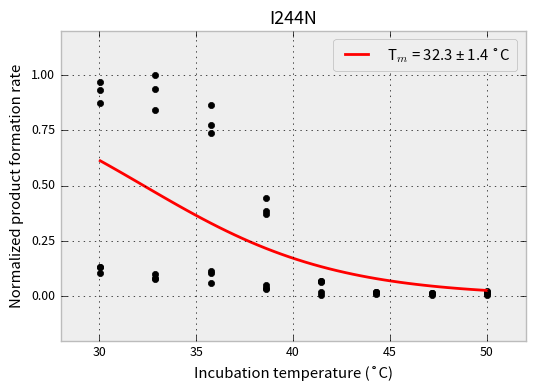

I300N


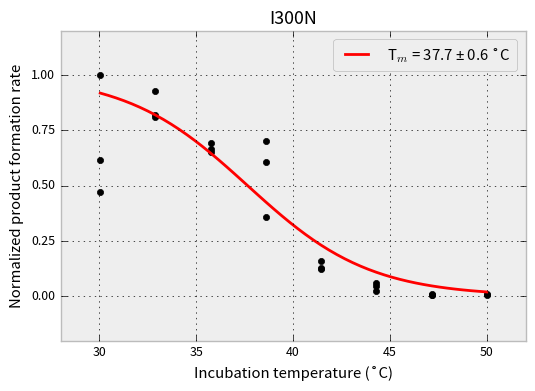

I91E


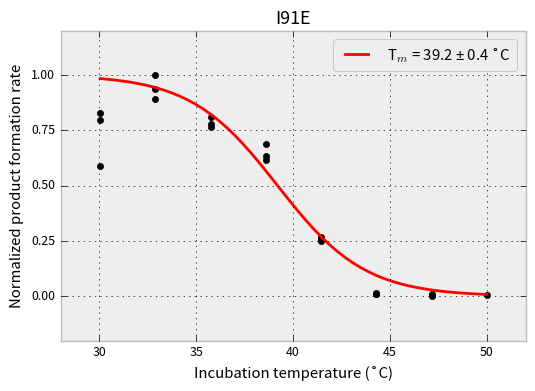

K341A


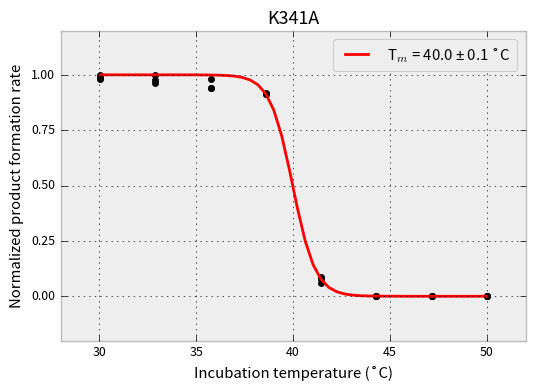

L171A


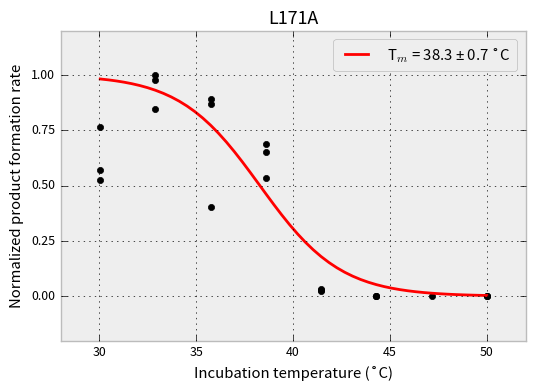

L171R


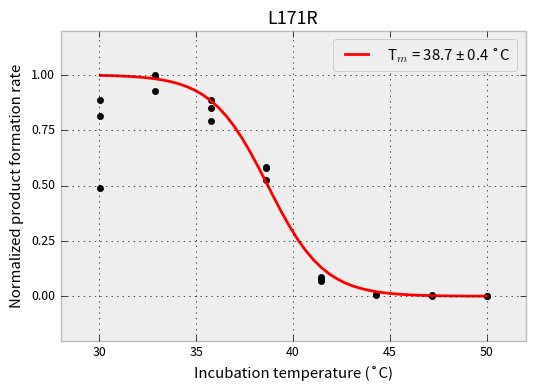

L362M


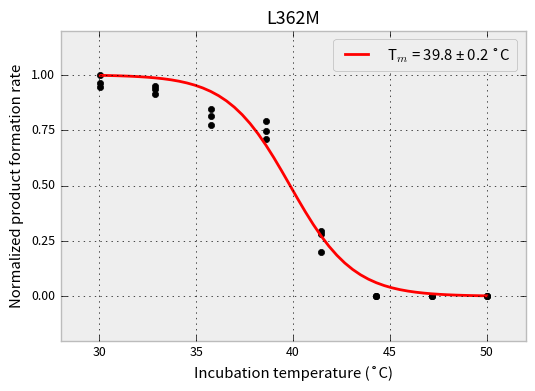

M221A


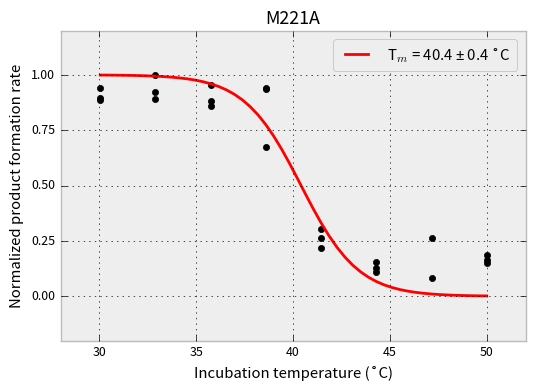

M323A


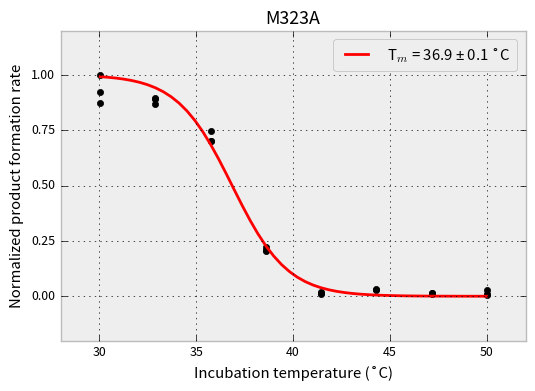

M358T


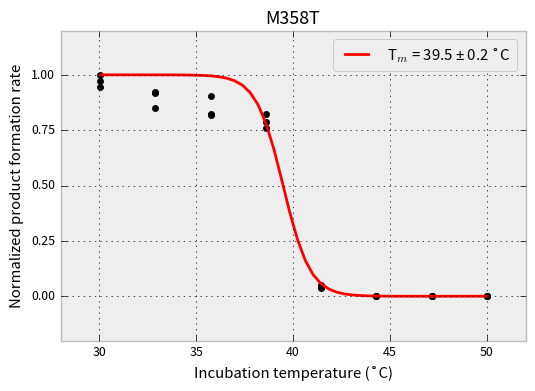

N163A


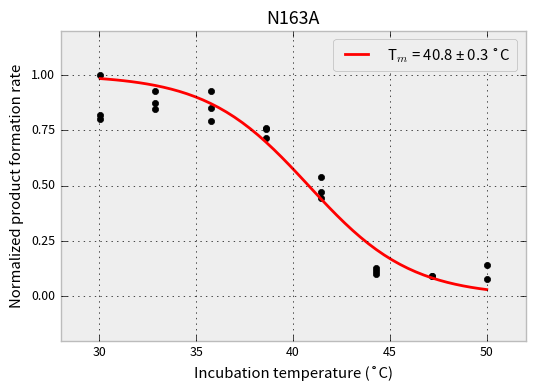

N163C


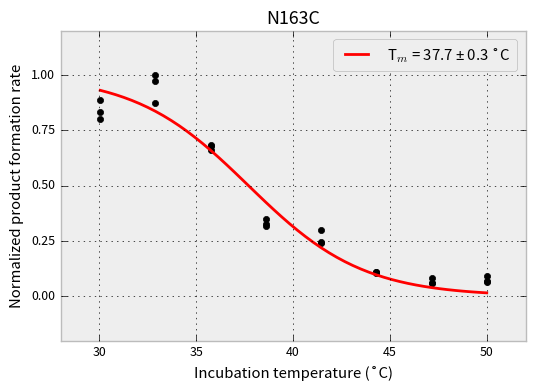

N163D


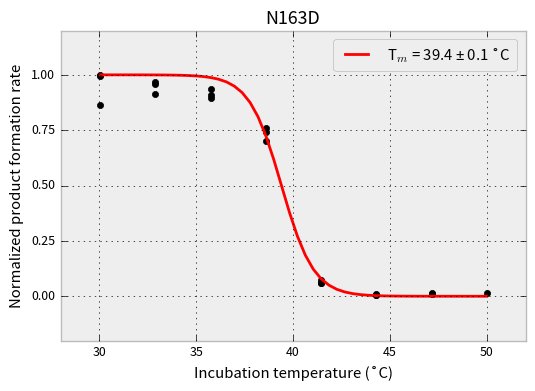

N220A


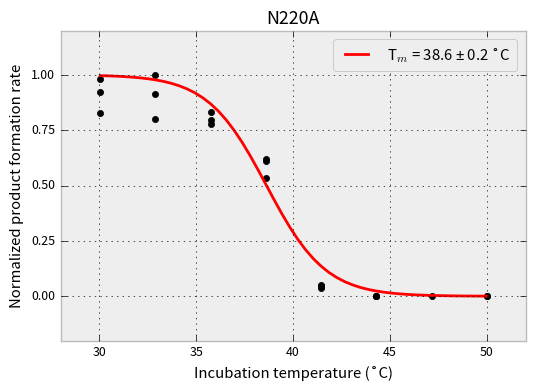

N220G


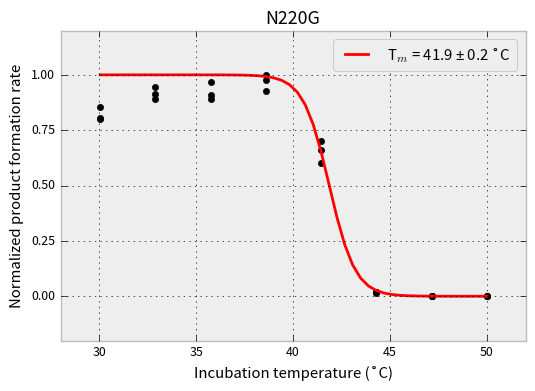

N220H


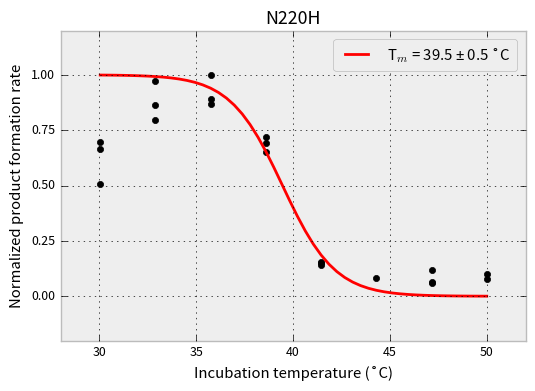

N220R


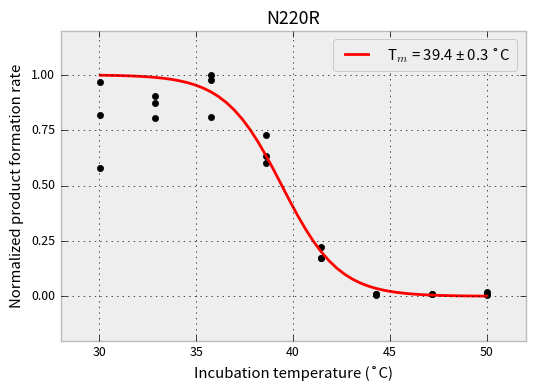

N220Y


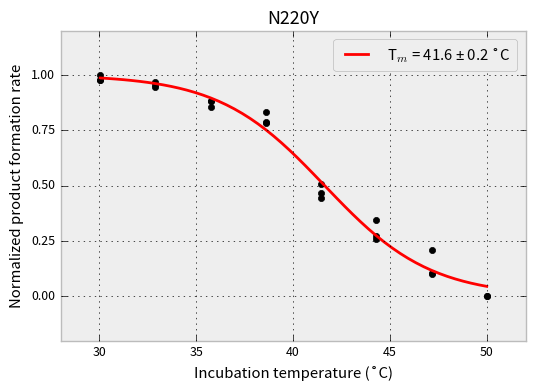

N293A


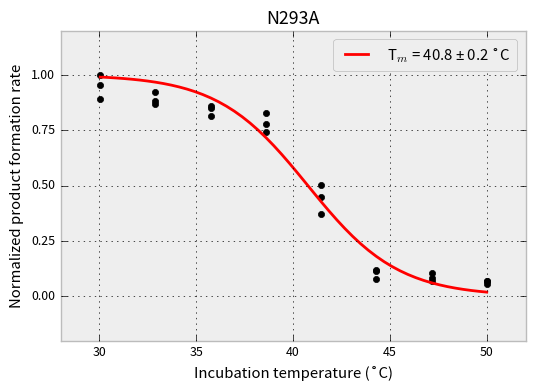

N293C


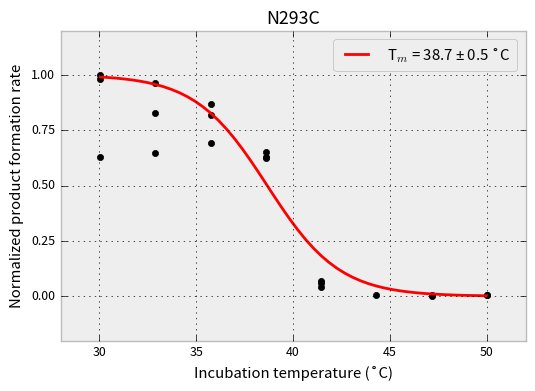

N354A


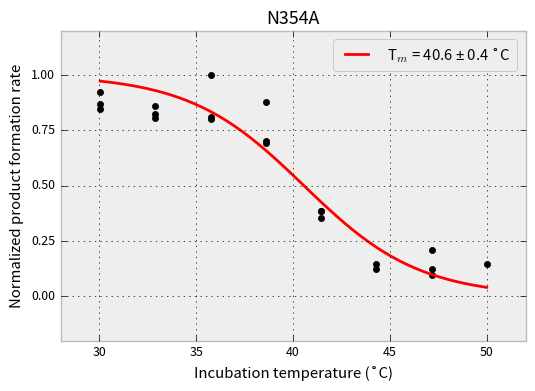

N404A


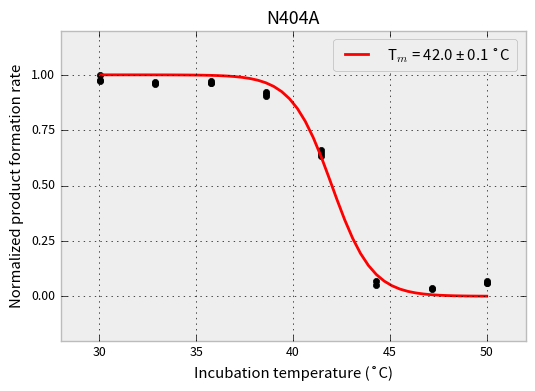

N404C


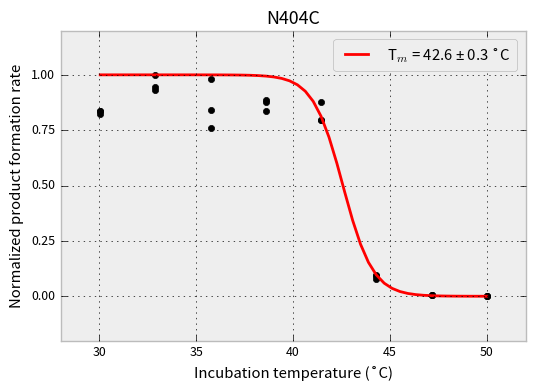

Q19S


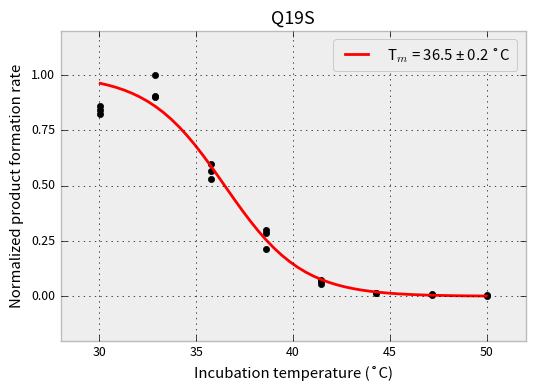

Q313R


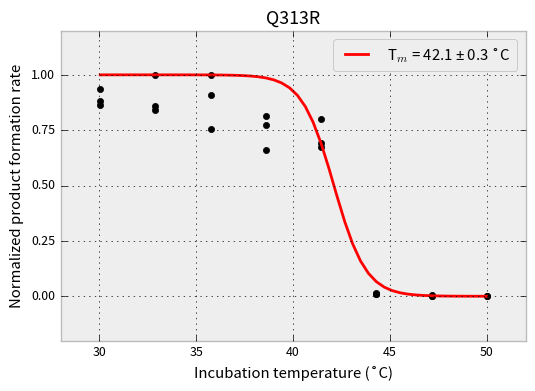

R240A


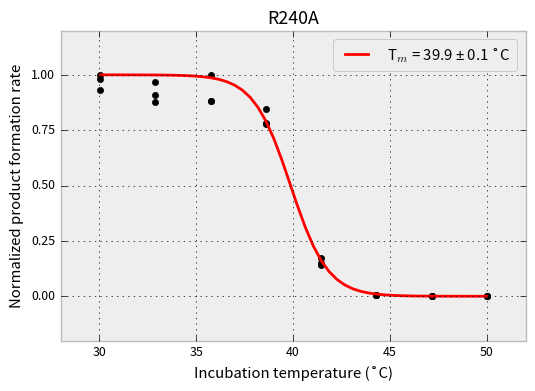

R240D


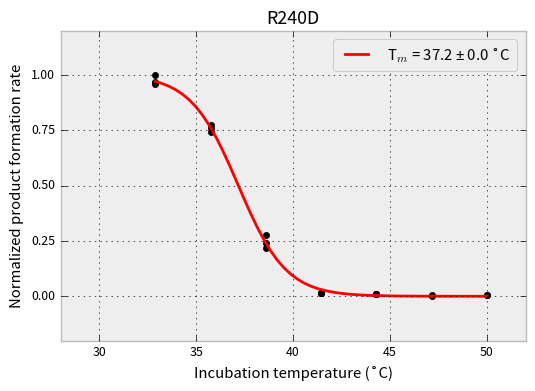

R240K


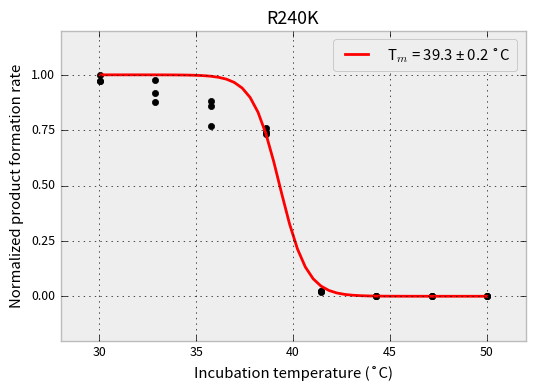

S14A


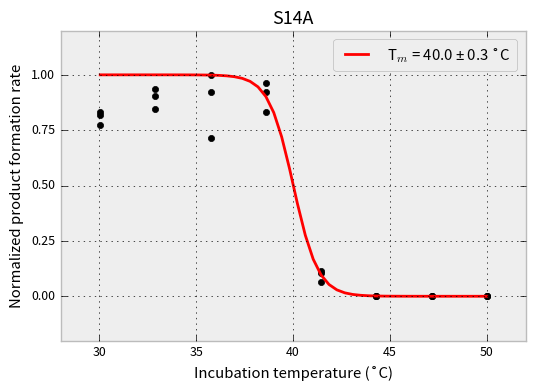

S16A


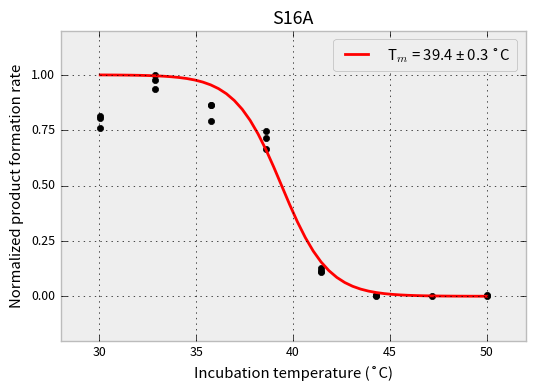

S17A


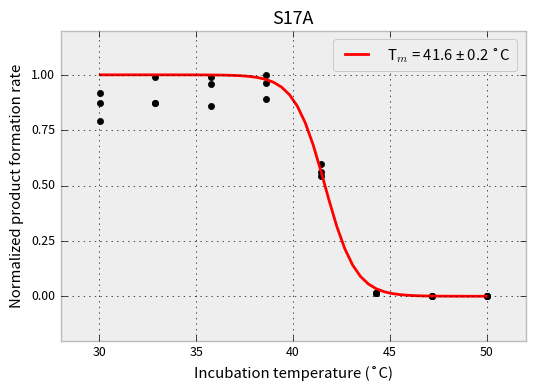

S17E


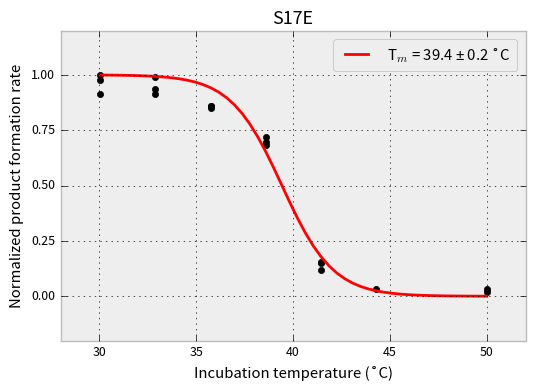

S298E


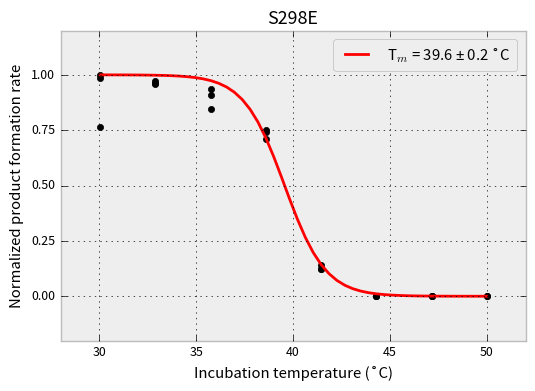

S331A


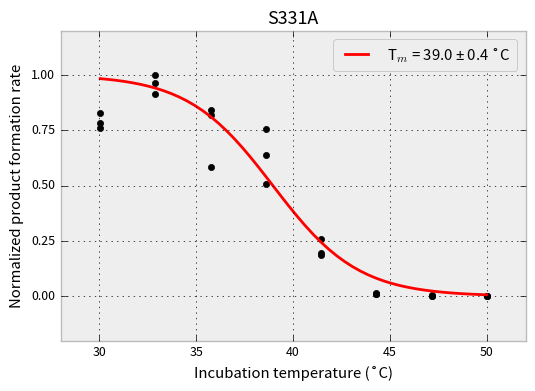

S400A


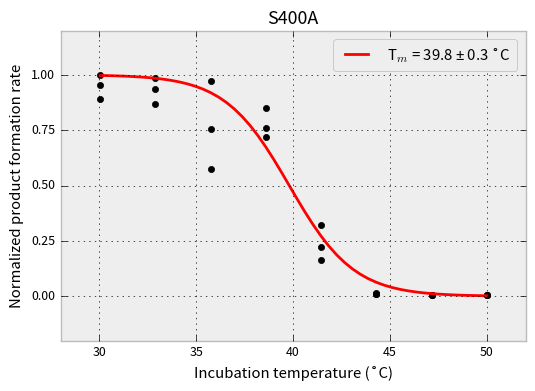

T15A


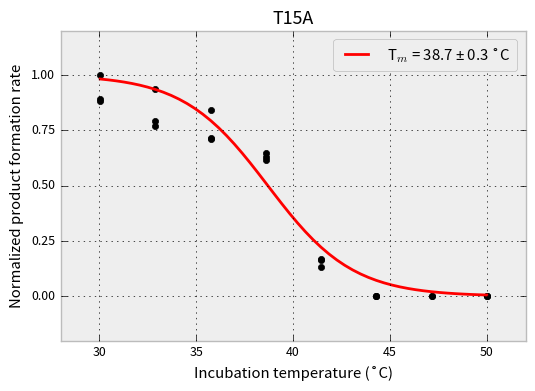

T175R


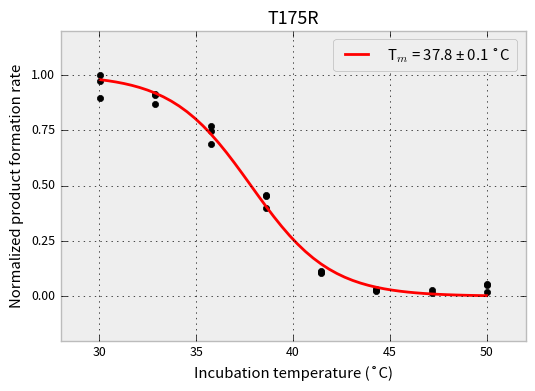

T218A


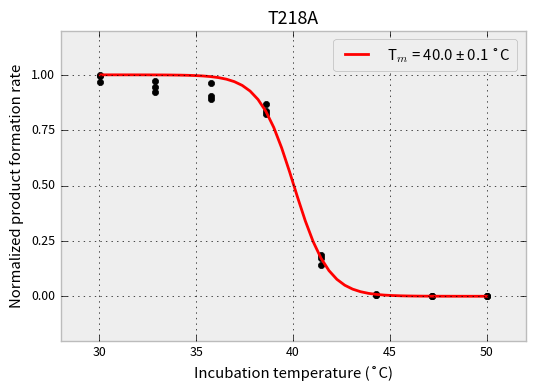

T352A


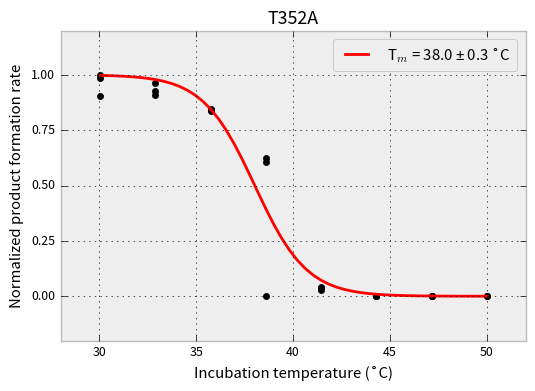

V52G


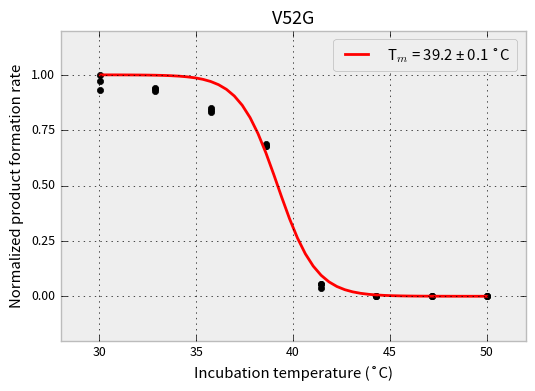

W120F


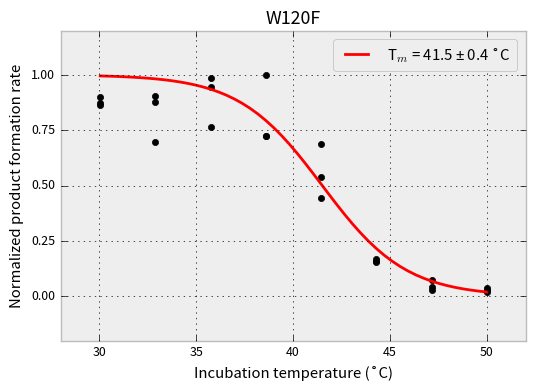

W120H


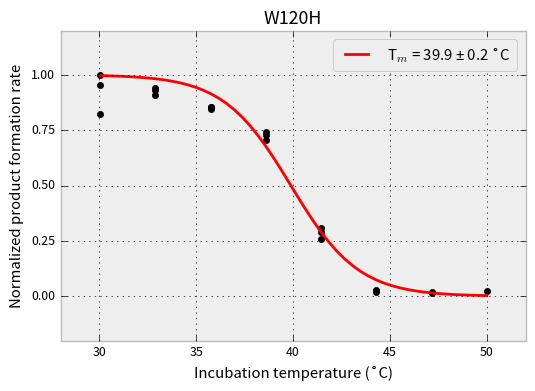

W325A


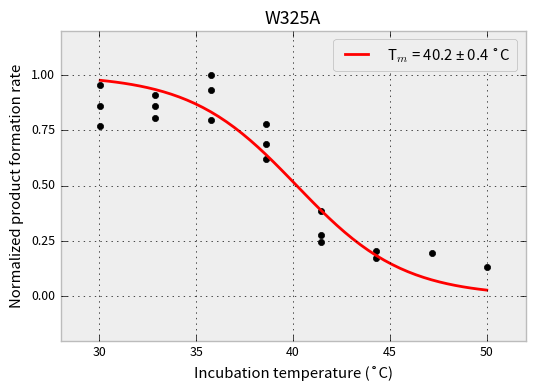

W325C


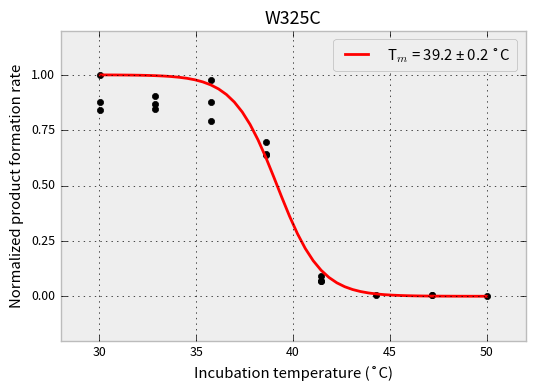

W325H


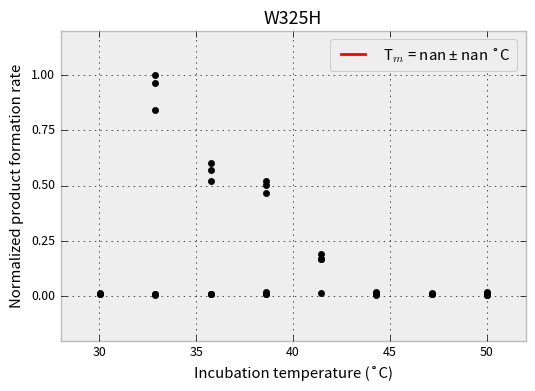

W325L


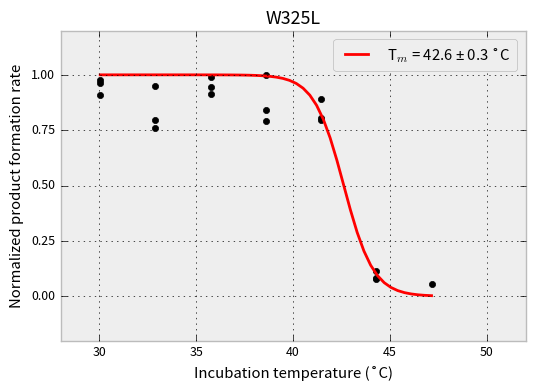

W325L_2


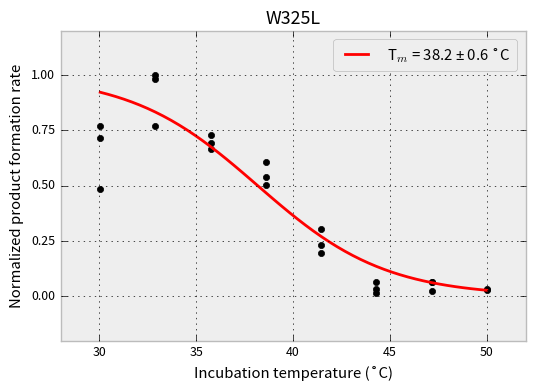

W325R


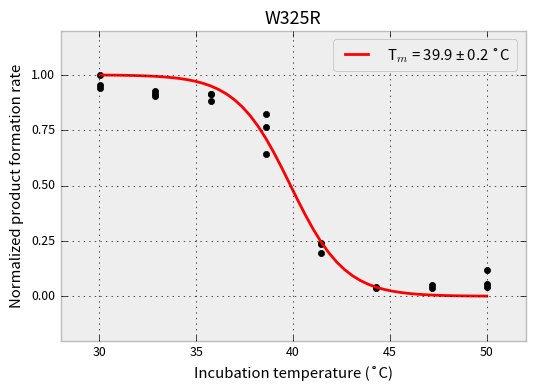

W399C


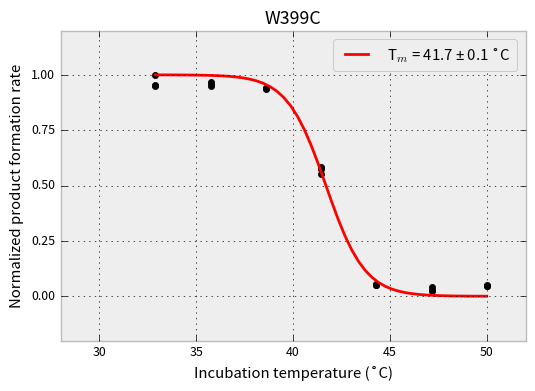

W409Y


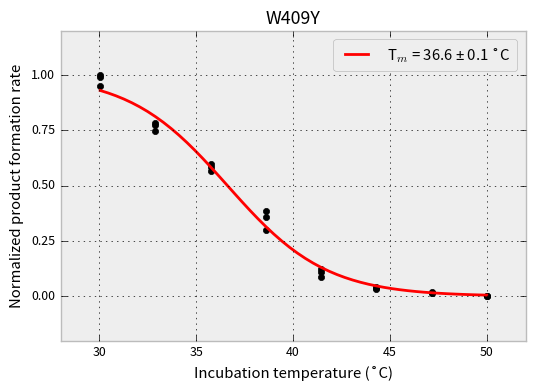

Y166P


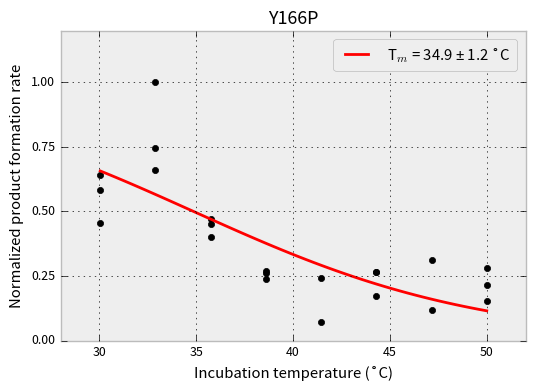

Y18A


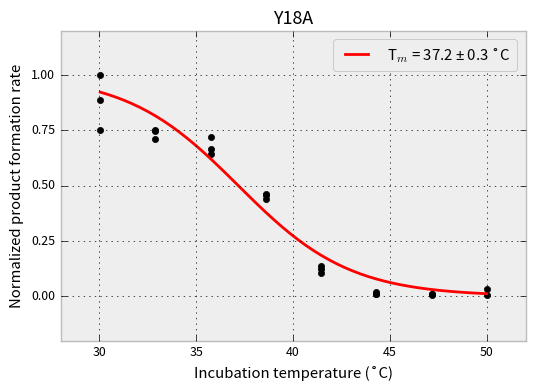

Y294A


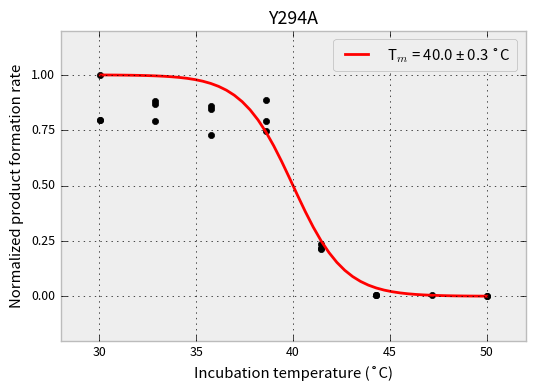

Y294F


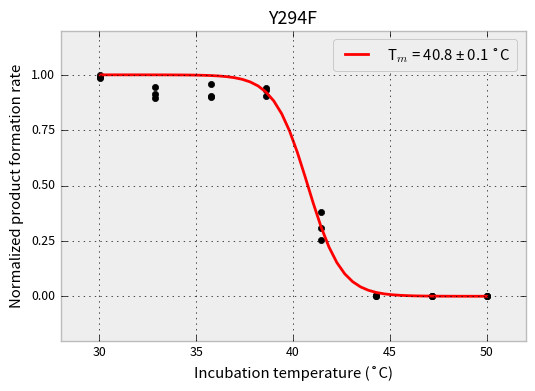

In [21]:
for idx, data in df.groupby( 'mutant' ):
    normalized_rates = data.rate / data.rate.max()
    plt.scatter( data.temp, normalized_rates, color='k' )
    x_vals = np.linspace( data.temp.min(), data.temp.max(), 50 )
    my_params = good_thermal_fits.loc[ idx ]
    plt.plot( x_vals, r( x_vals, my_params.tm, my_params.k ), color='red' )
    plt.legend( ['T$_m$ = {} ± {} ˚C'.format( my_params.tm.round(1), my_params.tm_std_err.round(1) )], loc=1 )
    plt.xlim( ( 28, 52 ) )
    plt.xticks( ( 30, 35, 40, 45, 50 ) ) 
    plt.xlabel( 'Incubation temperature (˚C)' )
    plt.yticks( ( 0, 0.25, .5, .75, 1 ) )
    plt.ylabel( 'Normalized product formation rate' ) 
    print( idx ) 
    #plt.title( idx ) 
    if '_' in idx:
        plt.title( idx.split( '_' )[0] )
    else:
        plt.title( idx )
    plt.show()